In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Nimish\Desktop\CSV files\marriage_age.csv")
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [3]:
df.shape

(2567, 10)

## EDA

In [4]:
# Checking for any null values
df.isnull().any()

id                 False
gender              True
height              True
religion            True
caste               True
mother_tongue       True
profession          True
location            True
country             True
age_of_marriage     True
dtype: bool

In [5]:
# Checking number of null Values in each column
df.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(1932, 10)

In [8]:
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


In [9]:
df.drop(['id'], axis=1, inplace=True)

In [10]:
df.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


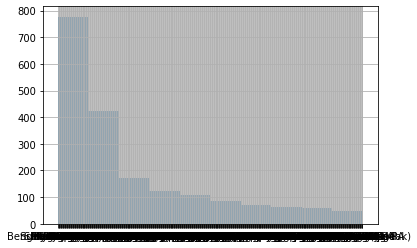

In [11]:
df.location.hist()

In [12]:
gender = {
    'male' : 1,
    'female': 0
}

In [13]:
df['gender'] = df['gender'].map(gender)

In [14]:
df.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,1,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,1,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,0,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,1,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,1,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0


In [15]:
df.profession.value_counts()

Not working                                    223
Not Specified                                  210
Banking Professional                            99
Software Professional                           96
Entrepreneurs / Business                        76
                                              ... 
Landscape Architect                              1
Veterinary Doctor / Healthcare Professional      1
Commercial Artist                                1
IAS / IRS / IES / IFS                            1
Pilot / Co-Pilot                                 1
Name: profession, Length: 84, dtype: int64

In [16]:
X = df.loc[:,['gender','height','religion','caste','mother_tongue','country']]
y = df.age_of_marriage

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['gender','religion','caste','mother_tongue','country']]= \
X.loc[:,['gender','religion','caste','mother_tongue','country']].apply(enc.fit_transform)

In [18]:
X.head()

,gender,height,religion,caste,mother_tongue,country
1,1,"5'7""",2,34,6,19
2,1,"5'7""",1,14,8,5
3,0,"5'0""",1,36,8,5
4,1,"5'5""",0,13,13,5
5,1,"5'5""",1,38,8,5


In [19]:
# Convert height into cms 
def h_cms(h):
    return int(h.split('\'')[0])*30.48+\
    int(h.split('\'')[1].replace('"',''))*2.54

In [20]:
X['height'] = X.height.apply(h_cms)

In [21]:
X.head()

,gender,height,religion,caste,mother_tongue,country
1,1,170.18,2,34,6,19
2,1,170.18,1,14,8,5
3,0,152.40,1,36,8,5
4,1,165.10,0,13,13,5
5,1,165.10,1,38,8,5


## Feature Importance and Selection

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
etr = ExtraTreesClassifier()

In [23]:
etr.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [24]:
feature_importance = etr.feature_importances_
feature_importance

array([0.02375006, 0.43499752, 0.04159275, 0.27172628, 0.1563716 ,
       0.07156178])

## Model 

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = lr.predict(X_test)

In [30]:
lr.score(X_test, y_test)

0.1283551036765922

### Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=80,max_depth=11)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

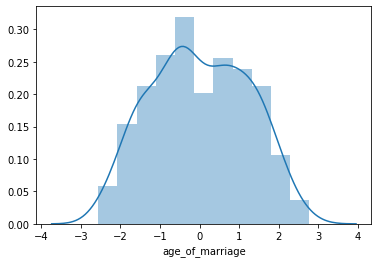

In [32]:
sns.distplot(y_test-y_predict)

In [33]:
model.score(X_test, y_test)

0.6997565511585633

### Hyperparameter Optimization

In [34]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [35]:
classifier = xgboost.XGBClassifier()

In [36]:
parameters = {
    'n_estimators':[50, 60, 70, 80, 90],
     'max_depth': [3, 4, 5 , 6, 8, 10, 11, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.5, 0.3],
    'min_child_weight' : [1, 3, 5, 7] ,
    'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4] ,
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
}

In [37]:
clf = RandomizedSearchCV(classifier, param_distributions = parameters, n_iter=5, verbose=3, cv=5, n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Nimish\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
print(clf.best_params_)

In [ ]:
print(clf.best_estimator_)

In [ ]:
model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
sns.distplot(y_test-y_pred)